### Can we classify each phase as relatively low or high anxiety for each subject? ###
#### APD, POPANE ####

In [1]:
# IMPORTING MODULES
import glob
import importlib
import matplotlib.pyplot as plt
import numpy as np
import os
cvx_path = os.path.abspath(os.path.join('..', '..', 'cvxEDA', 'src'))
module_path = os.path.abspath(os.path.join('..', '..', 'src'))
import pandas as pd
import random
import scipy.signal as ss
import shap
import sys
sys.path.append(module_path)

import tools.data_reader_apd as dr_a
import tools.data_reader_popane as dr_p
import tools.display_tools as dt
import tools.preprocessing as preprocessing
import train

from scipy.fft import fft, fftfreq, fftshift
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.preprocessing import normalize
from xgboost import XGBClassifier

import cvxopt.solvers
cvxopt.solvers.options['show_progress'] = False

import warnings
warnings.filterwarnings(
    "ignore", 
    category=RuntimeWarning
)
warnings.simplefilter(action='ignore', category=FutureWarning)

c:\Users\zhoux\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
metrics = [
    train.Metrics.BPM, 
    train.Metrics.RMSSD, 
    train.Metrics.HF_RR, 
    train.Metrics.LF_RR, 
    train.Metrics.IBI, 
    train.Metrics.SDNN, 
    train.Metrics.MEAN_SCL, 
    train.Metrics.SCR_RATE
]

model_phases_apd = [
    [
        "Baseline_Rest", 
        "BugBox_Relax", "BugBox_Anticipate", "BugBox_Exposure", "BugBox_Break",
        "Speech_Relax", "Speech_Anticipate", "Speech_Exposure", "Speech_Break"
    ],
    [
        "Baseline_Rest", 
        "BugBox_Relax", "BugBox_Anticipate", "BugBox_Break",
        "Speech_Relax", "Speech_Anticipate", "Speech_Break"
    ],
    [
        "Baseline_Rest", 
        "BugBox_Relax", "BugBox_Anticipate", 
        "Speech_Relax", "Speech_Anticipate"
    ],
    # [
    #     "Baseline_Rest", 
    #     "BugBox_Relax", "BugBox_Anticipate", "BugBox_Break",
    #     "Speech_Relax", "Speech_Anticipate", "Speech_Break"
    # ],
    ["BugBox_Break", "Speech_Break"],
    ["BugBox_Exposure", "Speech_Exposure"]
]

studies_popane = [
    "Study1",
    "Study2",
    "Study3",
    "Study4",
    "Study5",
    # "Study6",
    # "Study7"
]

model_phases_popane = [
    dr_p.Study1.ALL,
    dr_p.Study2.ALL,
    dr_p.Study3.ALL,
    dr_p.Study4.ALL,
    dr_p.Study5.ALL
    # dr_p.Study6.ALL
    # dr_p.Study7.ALL
]

apd_label_type = "Anxiety"
popane_label_type = "affect"

models = {
    "SVM": SVC(C=10, gamma=1),  # C=10, gamma=1
    # "KNN": KNeighborsClassifier(n_neighbors=7),
    # "DT": DecisionTreeClassifier(),
    "LogReg": LogisticRegression(max_iter=1000),
    # "Bayes": GaussianNB(),
    "XGB": XGBClassifier(use_label_encoder=False, objective="binary:logistic", eval_metric="logloss")
}

test_size = 0.8

`use_label_encoder` is deprecated in 1.7.0.


POPANE PHASES 0 --------------------------------------------------
APD PHASES 0 --------------------------------------------------
SVM accuracy over 10 rounds: 0.4890943138580652
LogReg accuracy over 10 rounds: 0.6152896432406634
XGB accuracy over 10 rounds: 0.6488048611939704


POPANE PHASES 1 --------------------------------------------------
APD PHASES 0 --------------------------------------------------
SVM accuracy over 10 rounds: 0.620857619410096
LogReg accuracy over 10 rounds: 0.7237054039359043
Model evaluation metrics for LogReg:
Precision: 0.7468721436596366
Recall: 0.9590062163173665
F1-score: 0.8391435127143106
AUC score: 0.48210495175071405


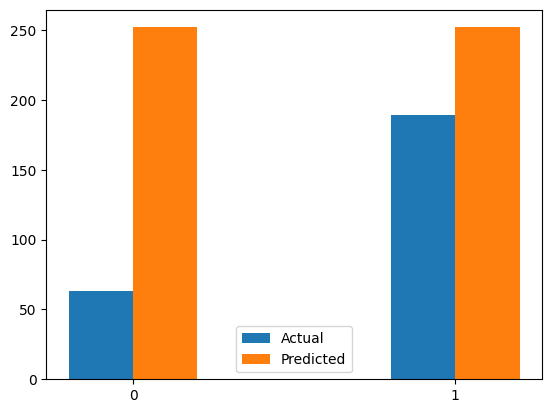

XGB accuracy over 10 rounds: 0.7054653030861892
Model evaluation metrics for XGB:
Precision: 0.7997055975741046
Recall: 0.8155584312630084
F1-score: 0.8055549572050152
AUC score: 0.5939684859711242


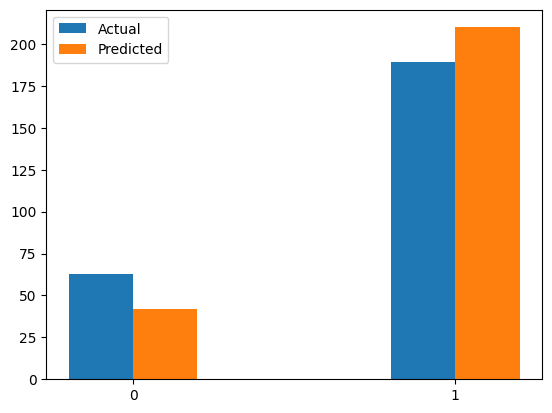



POPANE PHASES 2 --------------------------------------------------
APD PHASES 0 --------------------------------------------------
SVM accuracy over 10 rounds: 0.5221461560016551
LogReg accuracy over 10 rounds: 0.6537412481456963
Model evaluation metrics for LogReg:
Precision: 0.6707019173930195
Recall: 0.9541536073325065
F1-score: 0.7866456706217665
AUC score: 0.4980141405076301


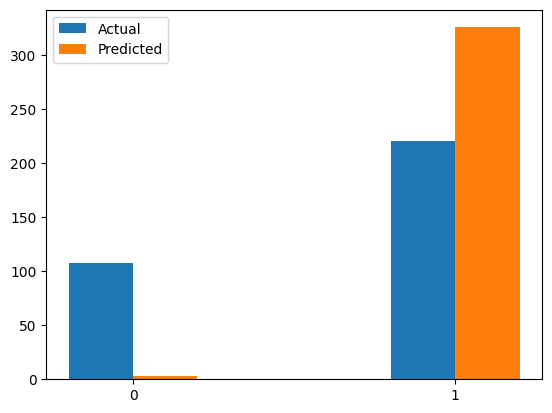

XGB accuracy over 10 rounds: 0.5578819489952742


POPANE PHASES 3 --------------------------------------------------
APD PHASES 0 --------------------------------------------------
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Onl

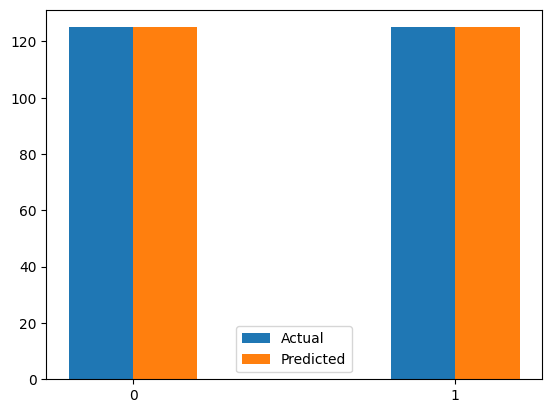

LogReg accuracy over 10 rounds: 1.0
Model evaluation metrics for LogReg:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC score: -1.0


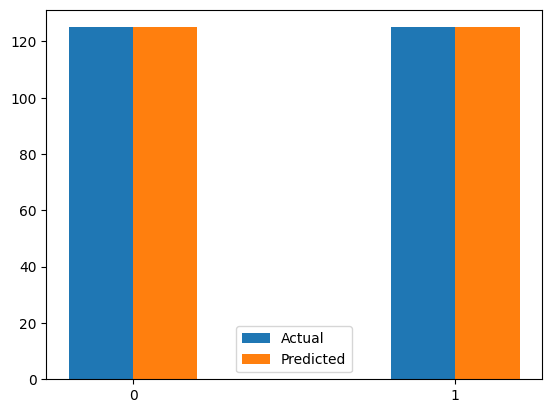

XGB accuracy over 10 rounds: 0.9912442444694414
Model evaluation metrics for XGB:
Precision: 1.0
Recall: 0.9912442444694414
F1-score: 0.9955918267546352
AUC score: -1.0


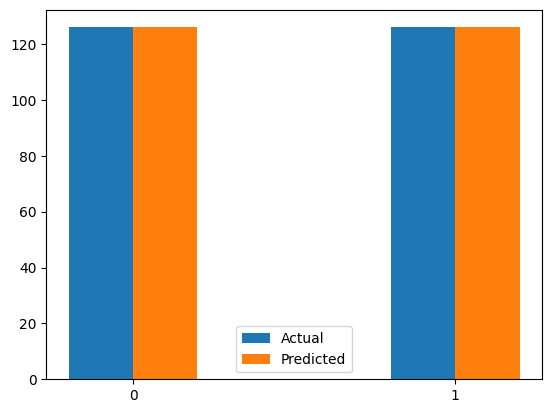



POPANE PHASES 4 --------------------------------------------------
APD PHASES 0 --------------------------------------------------
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is 

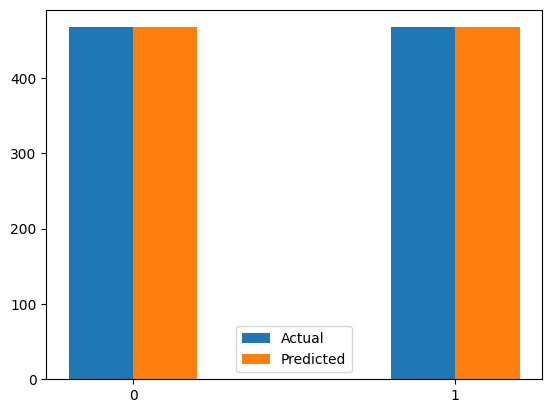

LogReg accuracy over 10 rounds: 1.0
Model evaluation metrics for LogReg:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC score: -1.0


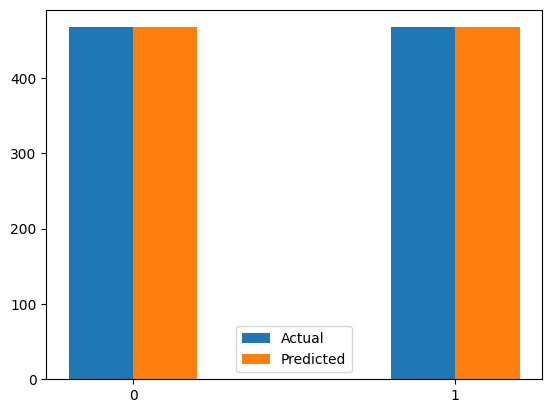

XGB accuracy over 10 rounds: 1.0
Model evaluation metrics for XGB:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC score: -1.0


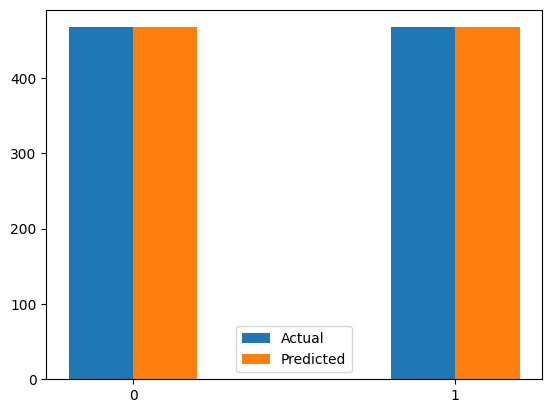



POPANE PHASES 0 --------------------------------------------------
APD PHASES 1 --------------------------------------------------
SVM accuracy over 10 rounds: 0.4854670617401796
LogReg accuracy over 10 rounds: 0.6156507526945869
XGB accuracy over 10 rounds: 0.6201382591576184


POPANE PHASES 1 --------------------------------------------------
APD PHASES 1 --------------------------------------------------
SVM accuracy over 10 rounds: 0.6074338348762733
LogReg accuracy over 10 rounds: 0.7688228530883587
Model evaluation metrics for LogReg:
Precision: 0.7740445200983184
Recall: 0.9828573881971486
F1-score: 0.8656644990373964
AUC score: 0.5426057327464443


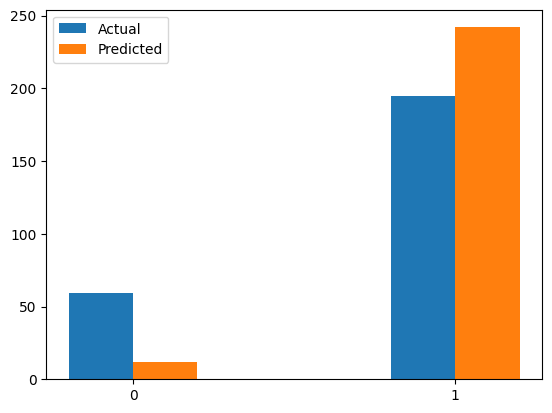

XGB accuracy over 10 rounds: 0.6887273969716197
Model evaluation metrics for XGB:
Precision: 0.7961635644245076
Recall: 0.7947523273408782
F1-score: 0.7941261764757634
AUC score: 0.5778963698081216


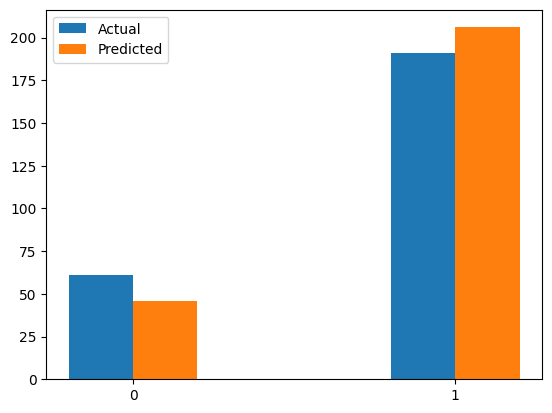



POPANE PHASES 2 --------------------------------------------------
APD PHASES 1 --------------------------------------------------
SVM accuracy over 10 rounds: 0.5208141850650045
LogReg accuracy over 10 rounds: 0.6658564496933076
Model evaluation metrics for LogReg:
Precision: 0.6680346737691354
Recall: 0.9937214680744093
F1-score: 0.7988736535532474
AUC score: 0.5001279298044004


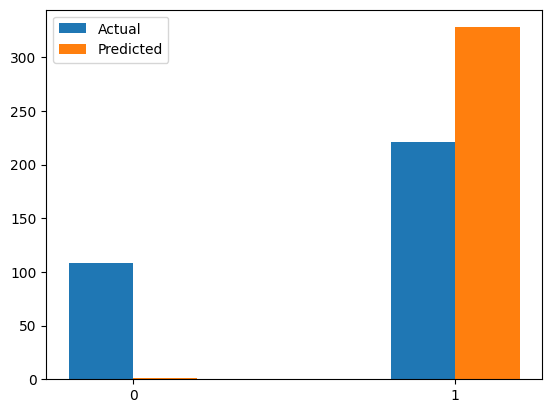

XGB accuracy over 10 rounds: 0.5472100586949208


POPANE PHASES 3 --------------------------------------------------
APD PHASES 1 --------------------------------------------------
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Onl

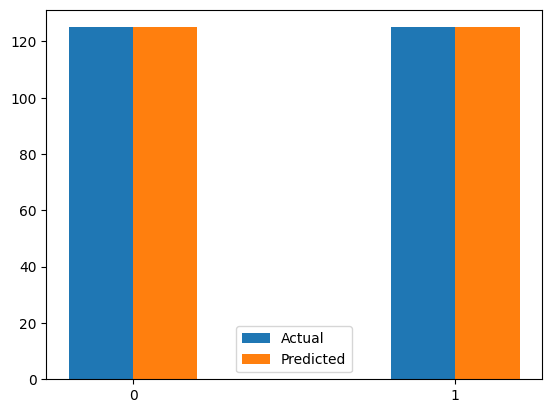

LogReg accuracy over 10 rounds: 1.0
Model evaluation metrics for LogReg:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC score: -1.0


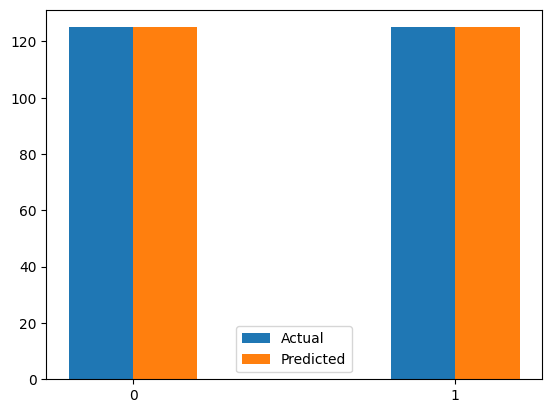

XGB accuracy over 10 rounds: 1.0
Model evaluation metrics for XGB:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC score: -1.0


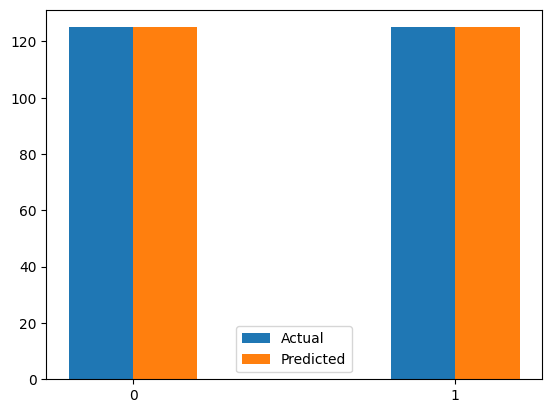



POPANE PHASES 4 --------------------------------------------------
APD PHASES 1 --------------------------------------------------
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is 

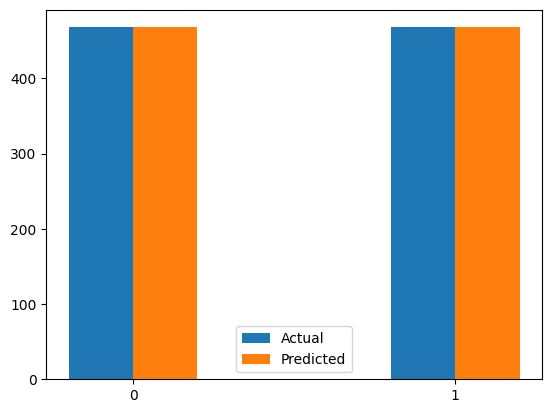

LogReg accuracy over 10 rounds: 1.0
Model evaluation metrics for LogReg:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC score: -1.0


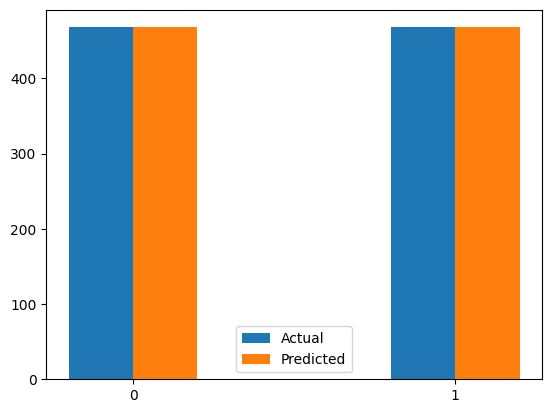

XGB accuracy over 10 rounds: 1.0
Model evaluation metrics for XGB:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC score: -1.0


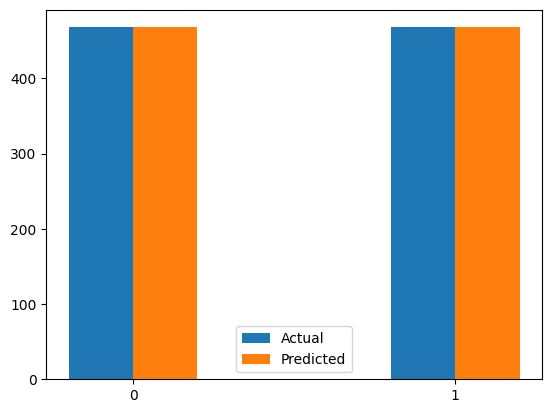



POPANE PHASES 0 --------------------------------------------------
APD PHASES 2 --------------------------------------------------
SVM accuracy over 10 rounds: 0.4868128637526681
LogReg accuracy over 10 rounds: 0.6172285609646158
XGB accuracy over 10 rounds: 0.6334425751368836


POPANE PHASES 1 --------------------------------------------------
APD PHASES 2 --------------------------------------------------
SVM accuracy over 10 rounds: 0.6175201936907545
LogReg accuracy over 10 rounds: 0.7771629273622325
Model evaluation metrics for LogReg:
Precision: 0.8110349214452732
Recall: 0.9297977656759651
F1-score: 0.8636301954233414
AUC score: 0.6134168794798527


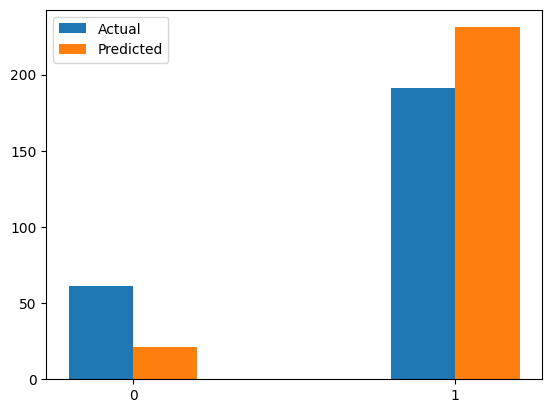

XGB accuracy over 10 rounds: 0.6918588812047713
Model evaluation metrics for XGB:
Precision: 0.8285015352948507
Recall: 0.7580791203445729
F1-score: 0.7872232205147991
AUC score: 0.6237299059522042


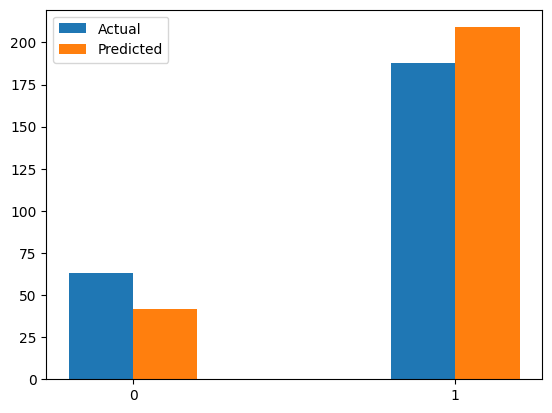



POPANE PHASES 2 --------------------------------------------------
APD PHASES 2 --------------------------------------------------
SVM accuracy over 10 rounds: 0.5295588851165121
LogReg accuracy over 10 rounds: 0.6602020109264435
Model evaluation metrics for LogReg:
Precision: 0.661012890637846
Recall: 0.997276784197993
F1-score: 0.7950138686315542
AUC score: 0.5004570167640935


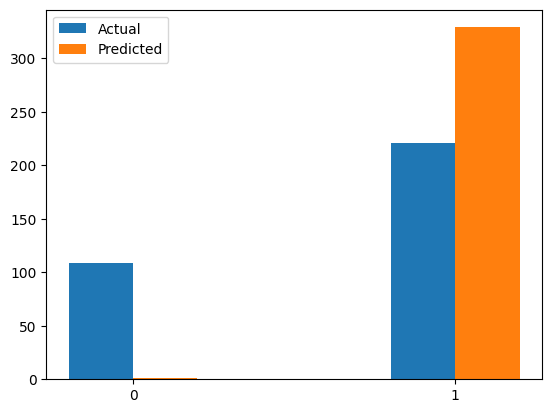

XGB accuracy over 10 rounds: 0.5547260583687915


POPANE PHASES 3 --------------------------------------------------
APD PHASES 2 --------------------------------------------------
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Onl

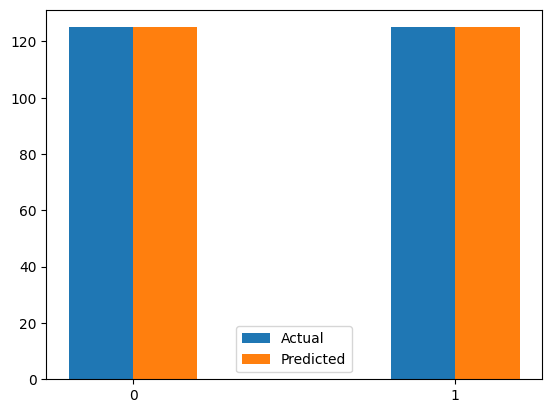

LogReg accuracy over 10 rounds: 1.0
Model evaluation metrics for LogReg:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC score: -1.0


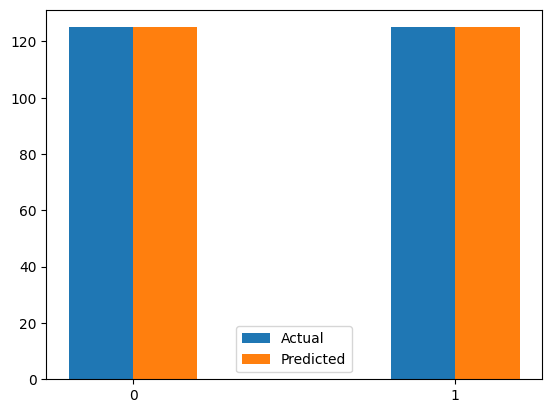

XGB accuracy over 10 rounds: 1.0
Model evaluation metrics for XGB:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC score: -1.0


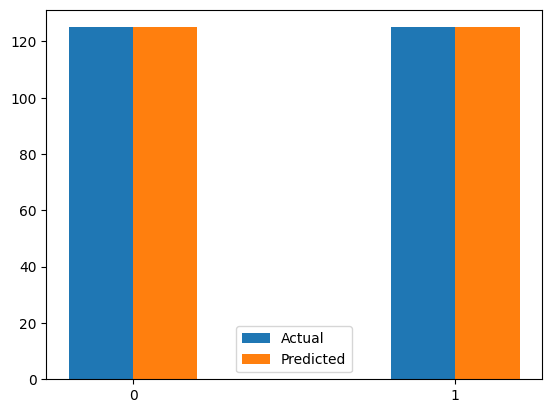



POPANE PHASES 4 --------------------------------------------------
APD PHASES 2 --------------------------------------------------
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is 

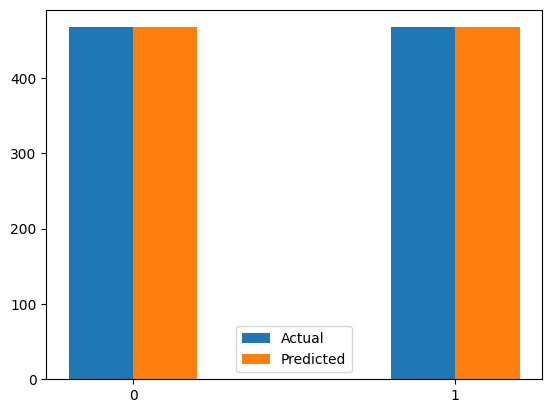

LogReg accuracy over 10 rounds: 1.0
Model evaluation metrics for LogReg:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC score: -1.0


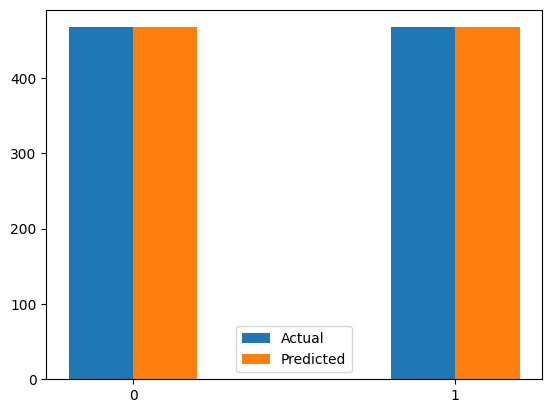

XGB accuracy over 10 rounds: 1.0
Model evaluation metrics for XGB:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC score: -1.0


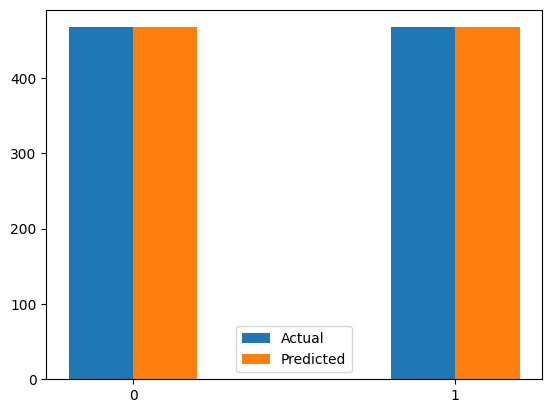



POPANE PHASES 0 --------------------------------------------------
APD PHASES 3 --------------------------------------------------
SVM accuracy over 10 rounds: 0.47679137831603235
LogReg accuracy over 10 rounds: 0.6139958189158016
XGB accuracy over 10 rounds: 0.627883506343714


POPANE PHASES 1 --------------------------------------------------
APD PHASES 3 --------------------------------------------------
SVM accuracy over 10 rounds: 0.5860814646885735
LogReg accuracy over 10 rounds: 0.78581453506169
Model evaluation metrics for LogReg:
Precision: 0.7996664271359764
Recall: 0.9593596169288544
F1-score: 0.8713026930378612
AUC score: 0.6091917973895322


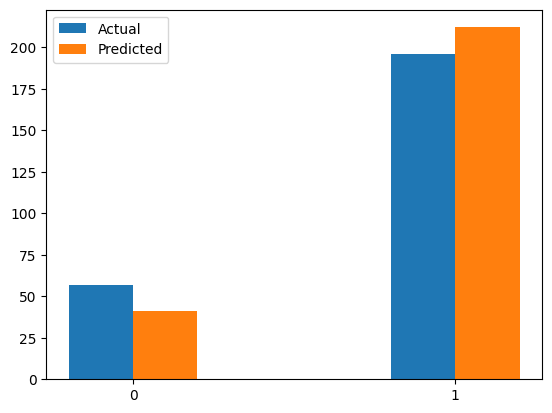

XGB accuracy over 10 rounds: 0.696111757755632
Model evaluation metrics for XGB:
Precision: 0.8041033532464377
Recall: 0.7935816253878513
F1-score: 0.7957421495708757
AUC score: 0.598821084580117


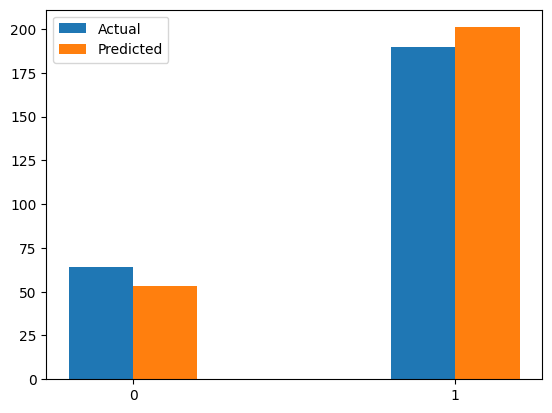



POPANE PHASES 2 --------------------------------------------------
APD PHASES 3 --------------------------------------------------
SVM accuracy over 10 rounds: 0.5228958943608297
LogReg accuracy over 10 rounds: 0.6535328342887642
Model evaluation metrics for LogReg:
Precision: 0.6558470292684412
Recall: 0.9936444967871237
F1-score: 0.7900496782231762
AUC score: 0.49909497566628913


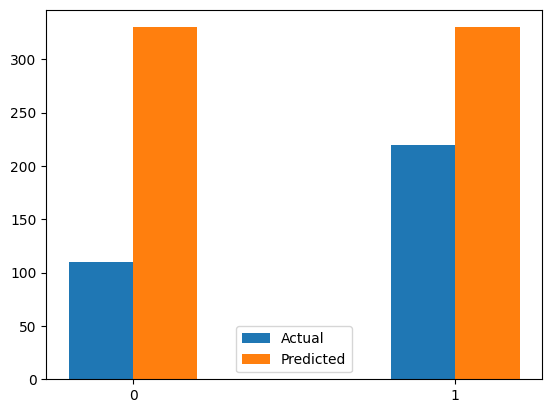

XGB accuracy over 10 rounds: 0.5729127072708741


POPANE PHASES 3 --------------------------------------------------
APD PHASES 3 --------------------------------------------------
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Onl

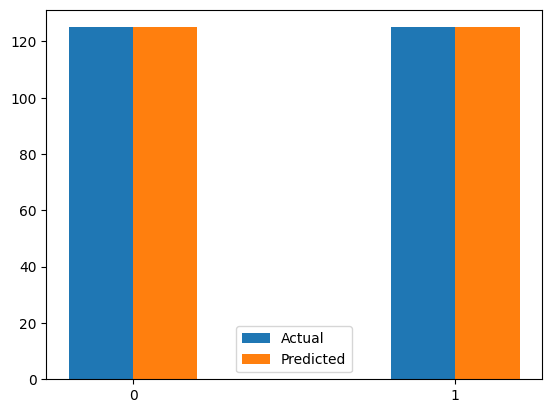

LogReg accuracy over 10 rounds: 1.0
Model evaluation metrics for LogReg:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC score: -1.0


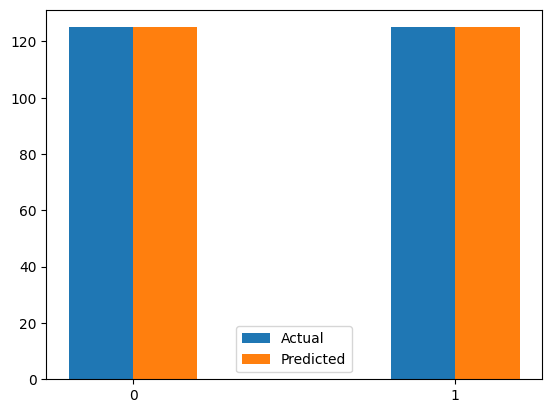

XGB accuracy over 10 rounds: 1.0
Model evaluation metrics for XGB:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC score: -1.0


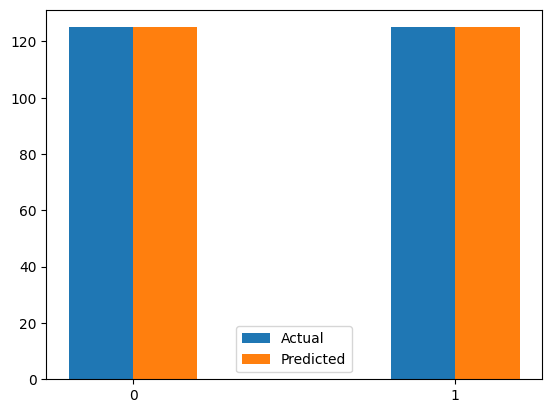



POPANE PHASES 4 --------------------------------------------------
APD PHASES 3 --------------------------------------------------
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is 

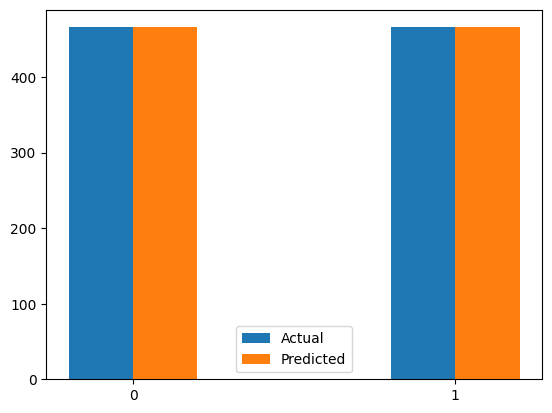

LogReg accuracy over 10 rounds: 1.0
Model evaluation metrics for LogReg:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC score: -1.0


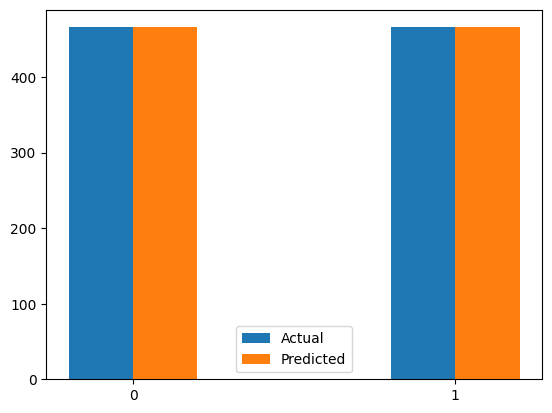

XGB accuracy over 10 rounds: 1.0
Model evaluation metrics for XGB:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC score: -1.0


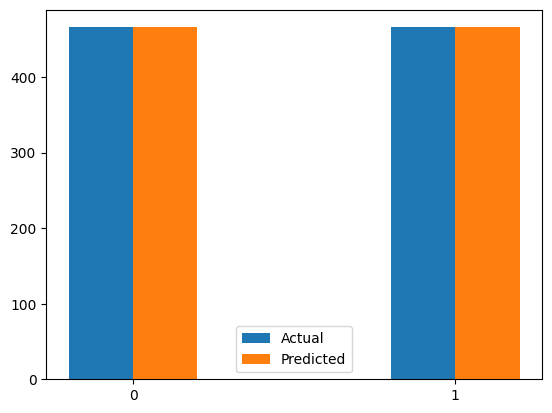



POPANE PHASES 0 --------------------------------------------------
APD PHASES 4 --------------------------------------------------
SVM accuracy over 10 rounds: 0.4741913256174681
LogReg accuracy over 10 rounds: 0.6119862884301794
XGB accuracy over 10 rounds: 0.6472997537419294


POPANE PHASES 1 --------------------------------------------------
APD PHASES 4 --------------------------------------------------
SVM accuracy over 10 rounds: 0.6045176597110676
LogReg accuracy over 10 rounds: 0.7780734183214106
Model evaluation metrics for LogReg:
Precision: 0.7866907061447834
Recall: 0.9713643034557957
F1-score: 0.8682782474395545
AUC score: 0.5839777020997307


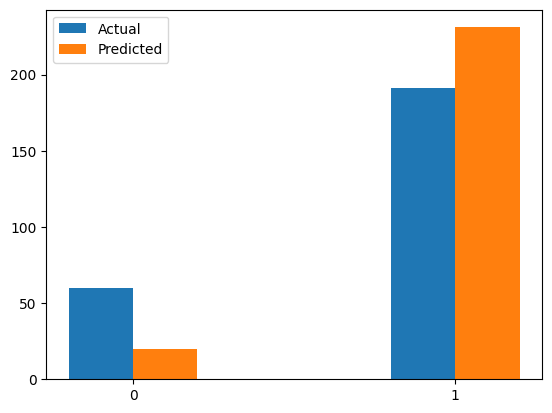

XGB accuracy over 10 rounds: 0.7034843906341857
Model evaluation metrics for XGB:
Precision: 0.8079809662703518
Recall: 0.7973394927238049
F1-score: 0.8015287314385482
AUC score: 0.6099232121545165


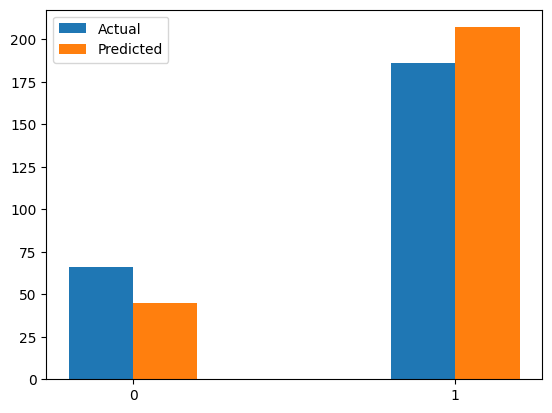



POPANE PHASES 2 --------------------------------------------------
APD PHASES 4 --------------------------------------------------
SVM accuracy over 10 rounds: 0.5027446978253689
LogReg accuracy over 10 rounds: 0.6584511224885333
Model evaluation metrics for LogReg:
Precision: 0.6586528356689699
Recall: 0.9995454545454546
F1-score: 0.7939758668795822
AUC score: 0.4997727272727273


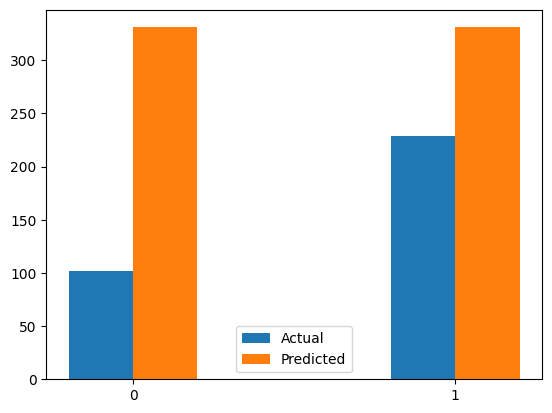

XGB accuracy over 10 rounds: 0.5713586679010604


POPANE PHASES 3 --------------------------------------------------
APD PHASES 4 --------------------------------------------------
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Onl

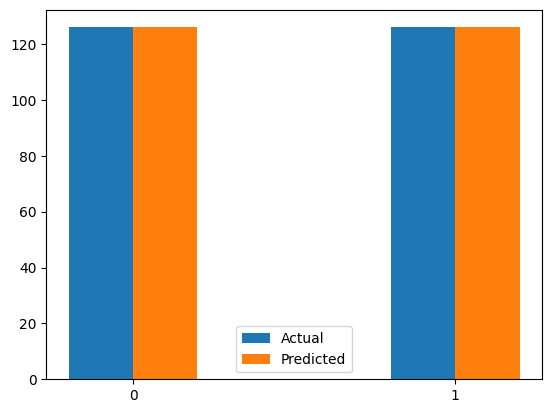

LogReg accuracy over 10 rounds: 1.0
Model evaluation metrics for LogReg:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC score: -1.0


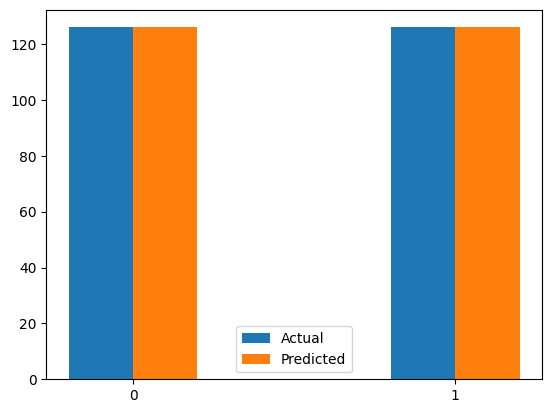

XGB accuracy over 10 rounds: 1.0
Model evaluation metrics for XGB:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC score: -1.0


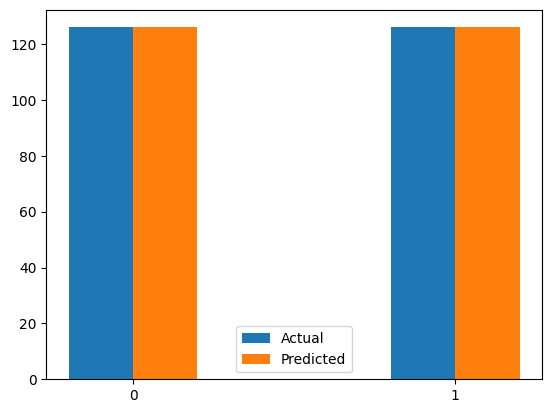



POPANE PHASES 4 --------------------------------------------------
APD PHASES 4 --------------------------------------------------
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is not defined in that case. Setting AUC score to -1.
Only one class present in y_true. ROC AUC score is 

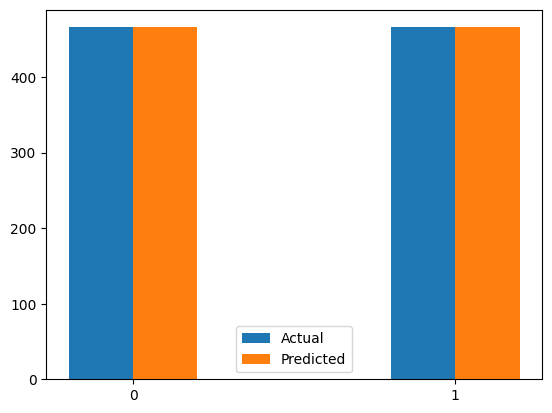

LogReg accuracy over 10 rounds: 1.0
Model evaluation metrics for LogReg:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC score: -1.0


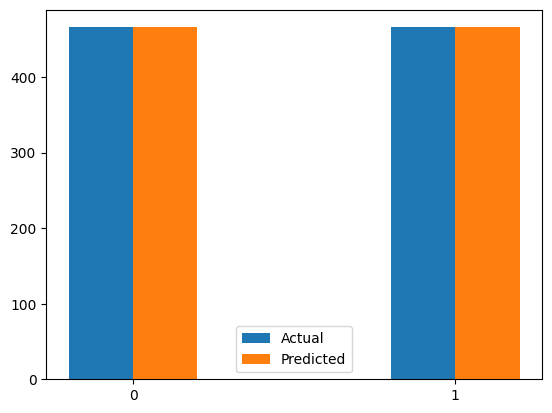

XGB accuracy over 10 rounds: 1.0
Model evaluation metrics for XGB:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC score: -1.0


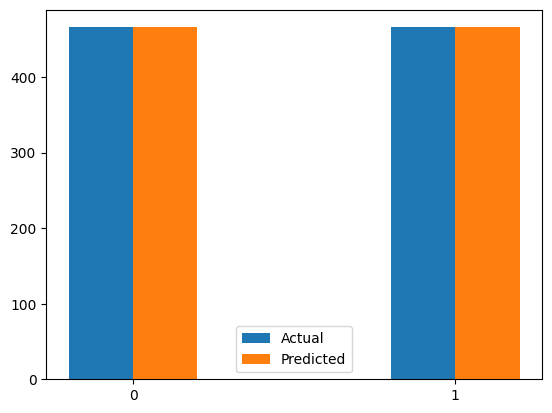

In [9]:
# TRAIN ON APD AND TEST ON POPANE
importlib.reload(train)
importlib.reload(dr_a)
importlib.reload(dr_p)
importlib.reload(dt)


for i, phases_apd in enumerate(model_phases_apd):
    for j, study in enumerate(studies_popane):
        print(f"POPANE PHASES {j} " + "-"*50)
        print(f"APD PHASES {i} " + "-"*50)
        x_a, y_a = train.Train_APD.get_apd_data_ranking(metrics, phases_apd, verbose=False, anxiety_label_type=apd_label_type)
        x_b, y_b = train.Train_POPANE.get_popane_data(study, metrics, model_phases_popane[j], verbose=False, label_type=popane_label_type)
        inds = pd.isnull(x_b).any(1).to_numpy().nonzero()[0]
        x_b = x_b.drop(inds, axis=0)
        y_b = y_b.drop(inds, axis=0)

        x_a = x_a.drop(["phaseId"], axis=1)
        x_b = x_b.drop(["phaseId"], axis=1)

        # drop subjects with noisy data
        x_a = x_a[x_a['subject'] != 84.0]
        x_a = x_a.drop(["anxietyGroup"], axis=1)  # drop anxietyGroup column because POPANE doesn't have this feature
        y_a = y_a[y_a['subject'] != 84.0]
        # x = x[x['subject'] != 8.0]
        # y = y[y['subject'] != 8.0]

        # make sure subjects from different datasets aren't labeled with the same index
        x_b["subject"] = x_b["subject"] + 500

        # 0-1 scaling
        for c in range(3, len(x_a.columns)):
            data_col = x_a[x_a.columns[c]]
            data_col = (data_col - data_col.min())/(data_col.max() - data_col.min())
            x_a[x_a.columns[c]] = data_col
        # 0-1 scaling
        for c in range(3, len(x_b.columns)):
            data_col = x_b[x_b.columns[c]]
            data_col = (data_col - data_col.min())/(data_col.max() - data_col.min())
            x_b[x_b.columns[c]] = data_col

        # print(y_a.loc[:, "label"].value_counts() + y_b.loc[:, "label"].value_counts())

        acc_results = {
            "SVM": [], 
            # "KNN": [],
            # "DT": [],
            "LogReg": [],
            # "Bayes": [],
            "XGB": []
        }
        reports = {
            "SVM": [], 
            # "KNN": [],
            # "DT": [],
            "LogReg": [],
            # "Bayes": [],
            "XGB": [],
        }
        num_iters = 10
        for _ in range(num_iters):
            out = train.Train_Multi_Dataset.train_across_datasets(models, x_a, y_a, x_b, y_b, by_subject=False, save_metrics=True, test_size=test_size)
            for model_name in acc_results:
                acc_results[model_name].append(out[model_name][0])
                reports[model_name].append(out[model_name][1])

        for model_name in acc_results.keys():
            acc = np.mean(acc_results[model_name])
            print(f"{model_name} accuracy over {num_iters} rounds: {acc}")
            if acc > 0.65:
                print(f"Model evaluation metrics for {model_name}:")
                p = np.mean([report["precision"] for report in reports[model_name]])
                r = np.mean([report["recall"] for report in reports[model_name]])
                f1 = np.mean([report["f1"] for report in reports[model_name]])
                idx = np.argmax([report["f1"] for report in reports[model_name]])
                auc = np.mean([report["auc"] for report in reports[model_name]])
                report = reports[model_name]
                print(f"Precision: {p}\nRecall: {r}\nF1-score: {f1}\nAUC score: {auc}")
                plot_y = reports[model_name][idx]["actual vs pred"]
                _, y_test_counts = np.unique(plot_y[0], return_counts=True)
                _, y_pred_counts = np.unique(plot_y[1], return_counts=True)
                br1 = [0, 0.5]
                br2 = [1, 1.5]
                
                x = [0, 1]
                x_axis = np.arange(len(x))
                plt.bar(x_axis-0.1, y_test_counts, 0.2, label="Actual")
                plt.bar(x_axis+0.1, y_pred_counts, 0.2, label="Predicted")
                plt.xticks(x_axis, x)
                plt.legend()
                plt.show()

        print("\n")

In [10]:
# TRAIN ON POPANE AND TEST ON APD
importlib.reload(train)
importlib.reload(dr_a)
importlib.reload(dr_p)
importlib.reload(dt)


for i, study in enumerate(studies_popane):
    for j, phases_apd in enumerate(model_phases_apd):
        print(f"POPANE PHASES {j} " + "-"*50)
        print(f"APD PHASES {i} " + "-"*50)
        x_a, y_a = train.Train_POPANE.get_popane_data(study, metrics, model_phases_popane[i], verbose=False, label_type=popane_label_type)
        x_b, y_b = train.Train_APD.get_apd_data_ranking(metrics, phases_apd, verbose=False, anxiety_label_type=apd_label_type)
        inds = pd.isnull(x_a).any(1).to_numpy().nonzero()[0]
        x_a = x_a.drop(inds, axis=0)
        y_a = y_a.drop(inds, axis=0)

        x_a = x_a.drop(["phaseId"], axis=1)
        x_b = x_b.drop(["phaseId"], axis=1)

        # drop subjects with noisy data
        x_b = x_b[x_b['subject'] != 84.0]
        x_b = x_b.drop(["anxietyGroup"], axis=1)  # drop anxietyGroup column because POPANE doesn't have this feature
        y_b = y_b[y_b['subject'] != 84.0]
        # x = x[x['subject'] != 8.0]
        # y = y[y['subject'] != 8.0]

        # make sure subjects from different datasets aren't labeled with the same index
        x_b["subject"] = x_b["subject"] + 500

        # 0-1 scaling
        for c in range(3, len(x_a.columns)):
            data_col = x_a[x_a.columns[c]]
            data_col = (data_col - data_col.min())/(data_col.max() - data_col.min())
            x_a[x_a.columns[c]] = data_col
        # 0-1 scaling
        for c in range(3, len(x_b.columns)):
            data_col = x_b[x_b.columns[c]]
            data_col = (data_col - data_col.min())/(data_col.max() - data_col.min())
            x_b[x_b.columns[c]] = data_col

        print(y_a.loc[:, "label"].value_counts() + y_b.loc[:, "label"].value_counts())
        
        acc_results = {
            "SVM": [], 
            # "KNN": [],
            # "DT": [],
            "LogReg": [],
            # "Bayes": [],
            "XGB": []
        }
        reports = {
            "SVM": [], 
            # "KNN": [],
            # "DT": [],
            "LogReg": [],
            # "Bayes": [],
            "XGB": [],
        }
        num_iters = 10
        for _ in range(num_iters):
            out = train.Train_Multi_Dataset.train_across_datasets(models, x_a, y_a, x_b, y_b, by_subject=False, save_metrics=True, test_size=test_size)
            for model_name in acc_results:
                acc_results[model_name].append(out[model_name][0])
                reports[model_name].append(out[model_name][1])

        for model_name in acc_results.keys():
            acc = np.mean(acc_results[model_name])
            print(f"{model_name} accuracy over {num_iters} rounds: {acc}")
            if acc > 0.65:
                print(f"Model evaluation metrics for {model_name}:")
                p = np.mean([report["precision"] for report in reports[model_name]])
                r = np.mean([report["recall"] for report in reports[model_name]])
                f1 = np.mean([report["f1"] for report in reports[model_name]])
                auc = np.mean([report["auc"] for report in reports[model_name]])
                report = reports[model_name]
                print(f"Precision: {p}\nRecall: {r}\nF1-score: {f1}\nAUC score: {auc}")
        print("\n")

POPANE PHASES 0 --------------------------------------------------
APD PHASES 0 --------------------------------------------------
1    535
0    291
Name: label, dtype: int64
SVM accuracy over 10 rounds: 0.6814189481981782
Model evaluation metrics for SVM:
Precision: 0.6808829641662089
Recall: 0.9975504943394293
F1-score: 0.8092945329284704
AUC score: 0.5069889059844966
LogReg accuracy over 10 rounds: 0.6627286421852971
Model evaluation metrics for LogReg:
Precision: 0.6919509711472477
Recall: 0.9166361561367831
F1-score: 0.7844828373811394
AUC score: 0.5260228709461694
XGB accuracy over 10 rounds: 0.6407670459706563


POPANE PHASES 1 --------------------------------------------------
APD PHASES 0 --------------------------------------------------
1    463
0    261
Name: label, dtype: int64
SVM accuracy over 10 rounds: 0.64592700167891
LogReg accuracy over 10 rounds: 0.642699878210163
XGB accuracy over 10 rounds: 0.6051250560304171


POPANE PHASES 2 ------------------------------------